## Lecture 2 - Exercises

## Q4: Bootstraps

Bootstrapping is a prominent statistical technique to estimate errors when you're stuck and don't know what else to do:

https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html
https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means).

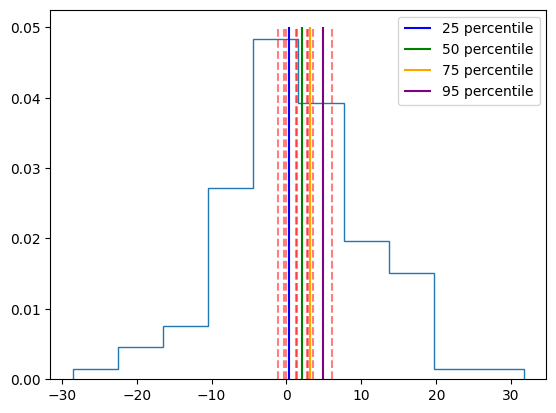

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

data = np.array([random.gauss(1,10) for n in range(100)] + [random.randint(-5,5) for m in range(10)])
plt.hist(data, density=True,histtype='step')

# bootstrap
n_itertion = 10
means=[]
for i in range(n_itertion):
    res = np.random.choice(data,10,replace=True)

    means.append(np.mean(res))

for m in means:
    plt.vlines(m,0,0.05,color='red',alpha=0.5,linestyle='--')


percentiles = np.percentile(means, [25,50,75, 95], axis=-1)
names=[25,50,75, 95]
color=['blue', 'green', 'orange', 'purple']

for p,t,c in zip(percentiles,names,color):
    plt.vlines(p,0,0.05, color=c, label=f'{t} percentile')

plt.legend(loc=0)





## Q3: Are you faster than numpy? No

Numpy of course has a standard deviation function, np.std(), but here we'll write our own that works on a 1-d array (vector). The standard deviation is a measure of the "width" of the distribution of numbers in the vector.

Given an array, , and an average 
, the standard deviation is:
 

Write a function to calculate the standard deviation for an input array, a:

First compute the average of the elements in a to define 
Next compute the sum over the squares of 
Then divide the sum by the number of elements in the array
Finally take the square root (you can use np.sqrt())
Test your function on a random array, and compare to the built-in np.std(). Check the runtime as well.

In [17]:
compute_std = lambda v: np.sqrt((1/len(v)) * np.sum((v-np.mean(v))**2))
sigma=5
a = np.array([random.gauss(10,sigma) for n in range(1000)])

print(f'sigma={compute_std(a)}')

print(f'The relative error % is {np.abs((compute_std(a) - sigma) / sigma) * 100}')

sigma=5.147623810713548
The relative error % is 2.9524762142709626


## Q6: Conway's Game of Life

Exercise: Code up Conway's Game of Life using numpy

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is really (really, really) cool.

There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

Any live cell with fewer than two live neighbours dies, as if by underpopulation.
Any live cell with two or three live neighbours lives on to the next generation.
Any live cell with more than three live neighbours dies, as if by overpopulation.
Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

TypeError: animate() takes 2 positional arguments but 3 were given

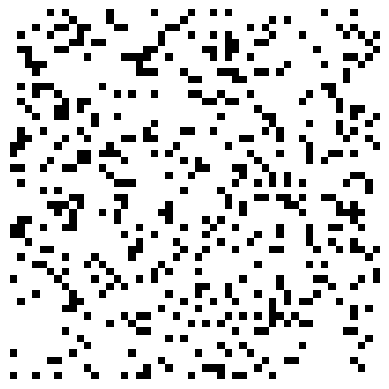

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(grid):
    """
    Update the grid to the next generation based on Conway's Game of Life rules.
    """
    # Create a padded version of the grid to handle edge wrapping
    padded_grid = np.pad(grid, pad_width=1, mode='wrap')
    new_grid = np.zeros_like(grid)

    # Iterate over each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Count the number of live neighbors
            total = np.sum(padded_grid[i:i+3, j:j+3]) - padded_grid[i+1, j+1]

            # Apply Conway's Game of Life rules
            if grid[i, j] == 1 and (total == 2 or total == 3):
                new_grid[i, j] = 1  # Cell lives on
            elif grid[i, j] == 0 and total == 3:
                new_grid[i, j] = 1  # Dead cell becomes alive
    return new_grid

def animate(img, grid):
    """
    Update the animation for the next frame.
    """
    new_grid = update(grid)
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

# Parameters 
grid_size = (50, 50)  # Size of the grid
initial_probability = 0.2  # Probability of a cell being alive at start

# Initialize the grid
grid = np.random.choice([0, 1], size=grid_size, p=[1 - initial_probability, initial_probability])

# Animation
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='binary')
ax.axis('off')

ani = animation.FuncAnimation(fig, animate, fargs=(img, grid), frames=200, interval=100, blit=True)


